### Install required dependencies

In [1]:
# !pip install numpy matplotlib

### Load dataset

In [1]:
import numpy as np

# I took this function from tutorials
def prepare_data(filename):
    patterns = []
    with open(filename) as f:
        count, width, height = [int(x) for x in f.readline().split()] # header
        dim = width*height

        for _ in range(count):
            f.readline() # skip empty line
            x = np.empty((height, width))
            for r in range(height):
                x[r,:] = np.array(list(f.readline().strip())) == '#'
            patterns.append(2*x.flatten()-1) # flatten to 1D vector, rescale {0,1} -> {-1,+1}
    
    return patterns, dim

patterns, dim = prepare_data('data.in')
labels = ['X', 'H', 'O', 'Z']

for p in patterns:
    print(p)

[-1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.]
[-1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.
  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1.]
[-1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.]
[-1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.]


## Corrupt dataset

In [2]:
# setting the seed globally for reproducibility
np.random.seed(42)  

def corrupt_patterns(patterns, k):
    corrupted_patterns = []
    for p in patterns:
        cp = np.copy(p)
        indices_to_flip = np.random.choice(len(p), size=k, replace=False)
        cp[indices_to_flip] *= -1
        corrupted_patterns.append(cp)
    return corrupted_patterns


# for p, cp in zip(patterns, corrupt_patterns(patterns, 23)):
#     print(f'Original: {p}')
#     print(f'Corrupted: {cp}')
    
#     print()
#     # print(np.sum(p == cp))  # Integer between 0 and len(p)


### Train hopfield

In [6]:
from hopfield import HopfieldNetwork

network = HopfieldNetwork(dim)
network.train(patterns)

results = {}
overlaps = {}
k_noises = [0, 7, 14, 21]
for k in k_noises:
    corrupted_patterns = corrupt_patterns(patterns, k) if k > 0 else list(patterns)
    results[k] = []
    overlaps[k] = [[] for _ in range(len(patterns))]
    for i, cp in enumerate(corrupted_patterns):
        states, energies = network.run_sync(cp)
        for state in states:
            overlaps[k][i].append(np.sum(state == patterns[i]) / len(state))
        results[k].append((states, energies))

## Count overlaps

In [4]:
def count_overlaps(states, original_patterns):
    results = [[] for _ in range(len(k_noises))]
    for i,op in enumerate(original_patterns):
        for s in states:
            results[i].append(np.sum(np.sign(s + op) > 0) / len(s))
    return results

overlaps = count_overlaps(states, patterns)

op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.6, 0.6285714285714286, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
op is [0.4, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.97142857142

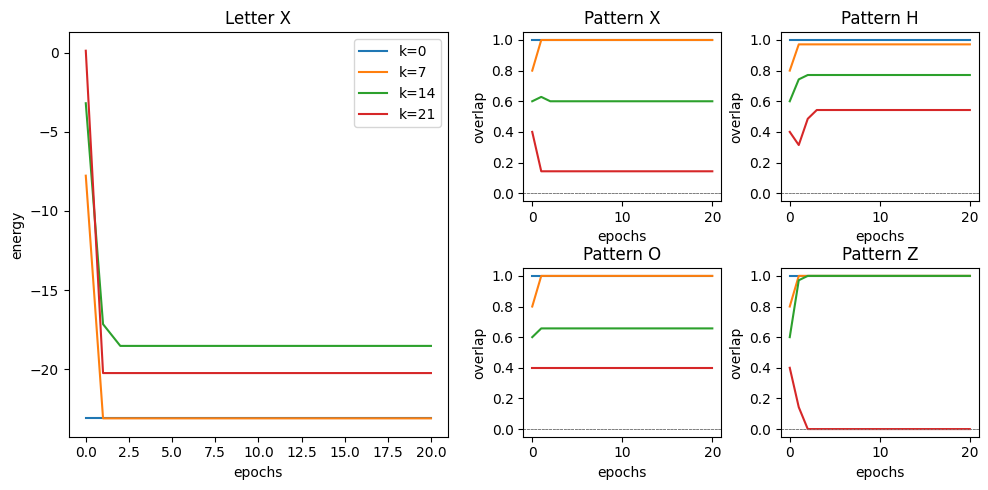

op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.6, 0.6285714285714286, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
op is [0.4, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.97142857142

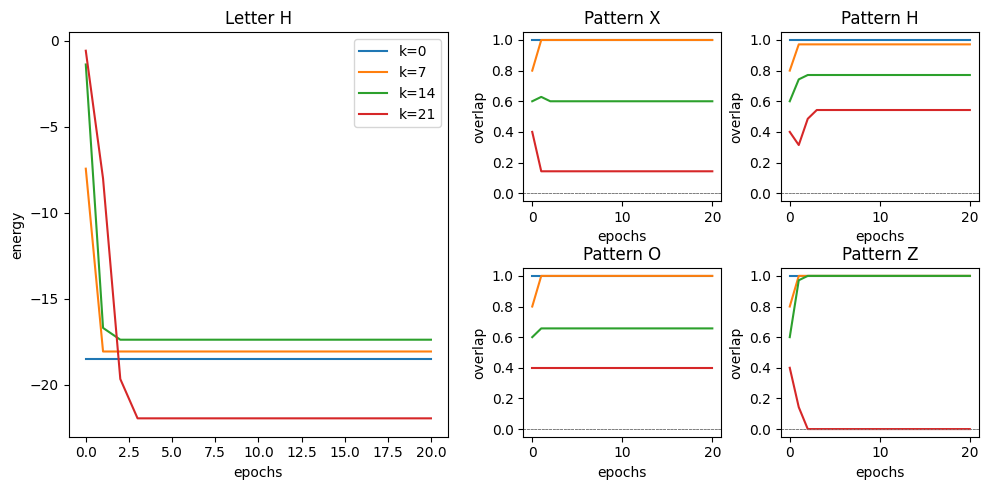

op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.6, 0.6285714285714286, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
op is [0.4, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.97142857142

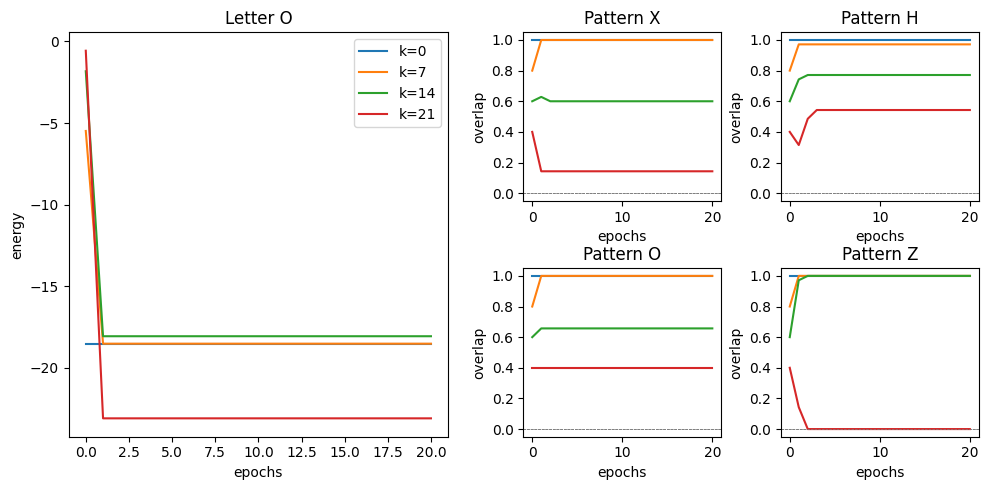

op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.6, 0.6285714285714286, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
op is [0.4, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
op is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
op is [0.8, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.97142857142

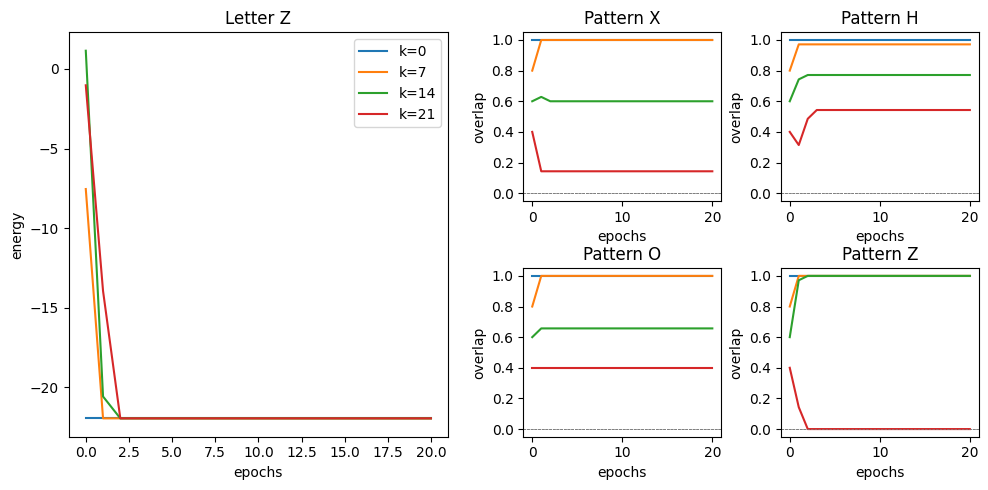

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

for letter_index in range(len(patterns)): 

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2])  # Left and right half

    ax0 = plt.subplot(gs[0])
    ax0.set_title(f'Letter {labels[letter_index]}')
    ax0.set_xlabel('epochs')
    ax0.set_ylabel('energy')

    data = [results[k][letter_index] for k in k_noises]
    for i, (states, energies) in enumerate(data):
        ax0.plot(energies, label=f'k={k_noises[i]}')
    ax0.legend()
    gs_right = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[1], wspace=0.3, hspace=0.4)




    for i in range(len(patterns)):
        ax = plt.subplot(gs_right[i])
        ax.set_title(f'Pattern {labels[i]}')
        ax.set_xlabel('epochs')
        ax.set_ylabel('overlap')
        
        data = [overlaps[k][i] for k in k_noises]
        for k, op in enumerate(data):
            ax.plot(op, label=f'k={k_noises[i]}')
            ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0

    plt.tight_layout()
    plt.show()
